In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone

In [4]:
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_seq_items', 500)

In [5]:
def from_epoch_time(value) -> datetime:
    return pd.to_datetime(value, unit="s")

In [6]:
COUNTRY = "united states"

STOCK_FILE = "data/stock.xlsx"
SHEET_NAME_STOCK = "stock"

STOCK_INFO_FILE = "data/stock_info.xlsx"
SHEET_NAME_STOCK_INFO = "stock_info"

STOCK_STATS_FILE = "data/stock_stats.xlsx"
SHEET_NAME_STOCK_STATS = "stock_stats"

STOCK_DIVIDEND_FILE = "data/stock_dividends.xlsx"
SHEET_NAME_STOCK_DIVIDEND = "stock_dividends"

In [7]:
df_stock = pd.read_excel(STOCK_FILE, sheet_name=SHEET_NAME_STOCK, engine="openpyxl")
df_stock_info = pd.read_excel(STOCK_INFO_FILE, sheet_name=SHEET_NAME_STOCK_INFO, engine="openpyxl")
df_stock_stats = pd.read_excel(STOCK_STATS_FILE, sheet_name=SHEET_NAME_STOCK_STATS, engine="openpyxl")
df_stock_dividend = pd.read_excel(STOCK_DIVIDEND_FILE, sheet_name=SHEET_NAME_STOCK_DIVIDEND, engine="openpyxl")

In [8]:
# Convert field names to lower case
df_stock = df_stock.rename(columns=str.lower)
df_stock_info = df_stock_info.rename(columns=str.lower)
df_stock_stats = df_stock_stats.rename(columns=str.lower)
df_stock_dividend = df_stock_dividend.rename(columns=str.lower)

# Stocks by Sector

In [9]:
df_stock["exchange"].unique()

array(['NYQ', 'PNK', 'NMS', 'ASE', 'NGM', 'NCM', 'BTS', 'PCX', 'NAS'],
      dtype=object)

In [10]:
len(df_stock)

9649

In [11]:
df_stock_info["symbol"].describe()

count     8353
unique    8353
top          A
freq         1
Name: symbol, dtype: object

In [12]:
df_stock_info.groupby(by=["sector"], axis=0)["symbol"].count()

sector
Basic Materials            341
Communication Services     378
Consumer Cyclical          631
Consumer Defensive         354
Energy                     381
Financial                    2
Financial Services        2438
Healthcare                1387
Industrials                889
Real Estate                430
Services                     2
Technology                 899
Utilities                  143
Name: symbol, dtype: int64

In [13]:
df_stock_stats["symbol"].describe()

count     8267
unique    8267
top          A
freq         1
Name: symbol, dtype: object

In [14]:
df_stock_stats.groupby(by=["sector"], axis=0)["symbol"].count()

sector
Basic Materials            358
Communication Services     386
Consumer Cyclical          643
Consumer Defensive         363
Consumer Goods               2
Energy                     393
Financial                    1
Financial Services        2336
Healthcare                1390
Industrials                905
Real Estate                431
Services                     2
Technology                 911
Utilities                  146
Name: symbol, dtype: int64

In [15]:
df_sector = df_stock_info.groupby(by=["sector"], axis=0)["symbol"].count()

array([<AxesSubplot:ylabel='symbol'>], dtype=object)

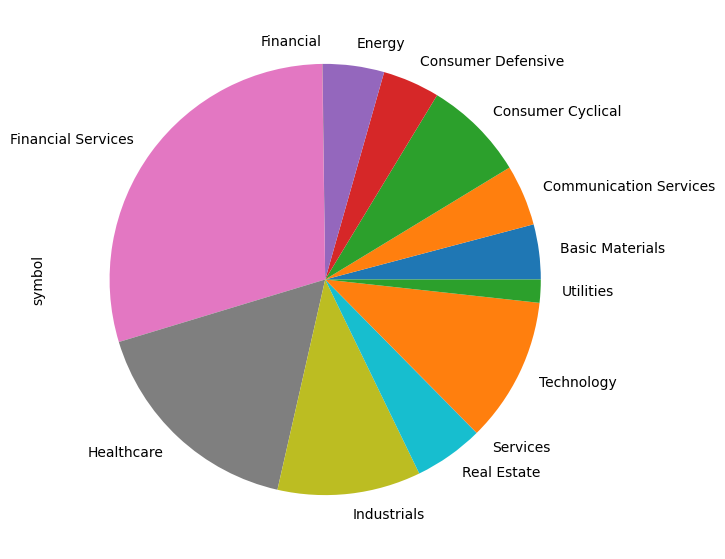

In [16]:
df_sector.plot.pie(subplots=True,figsize=(7, 7))

# Dividend Yield - Last 5 Years

## All Stocks

In [17]:
#df_stock_stats.dtypes

In [18]:
df_stock_stats["lastdividenddate"] = df_stock_stats["lastdividenddate"].apply(from_epoch_time)

In [19]:
df_yield = df_stock_stats.sort_values(by=["fiveyearavgdividendyield"], ascending=False)[["symbol","name","sector","fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate", "threeyearaveragereturn", "fiveyearaveragereturn" ]]

In [20]:
df_yield[df_yield["lastdividenddate"].dt.year == 2022].head(30)

,symbol,name,sector,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate,threeyearaveragereturn,fiveyearaveragereturn
1439,CEN,Center Coast Brookfield MLP & E,Financial Services,24.95,0.225,2022-09-13,NaN,NaN
1530,CHKR,CHESAPEAKE GRANITE WASH TR,Energy,22.62,0.085,2022-08-18,NaN,NaN
5335,NTG,"Tortoise Midstream Energy Fund,",Financial Services,20.49,0.770,2022-08-23,NaN,NaN
2893,FMO,Fiduciary/Claymore Energy Infra,Financial Services,20.12,0.245,2022-02-14,NaN,NaN
1617,CLM,111422,Financial Services,19.93,0.181,2022-09-14,NaN,NaN
1828,CRF,33138,Financial Services,19.61,0.173,2022-09-14,NaN,NaN
5632,OXLC,Oxford Lane Capital Corp.,Financial Services,18.62,0.075,2022-09-15,NaN,NaN
4092,IVR,INVESCO MORTGAGE CAPITAL INC,Real Estate,18.20,0.900,2022-07-08,NaN,NaN
5575,ORC,"Orchid Island Capital, Inc.",Real Estate,18.03,0.160,2022-08-30,NaN,NaN
2340,ECTM,ECA Marcellus Trust I,Energy,17.98,0.176,2022-08-18,NaN,NaN


## By Sector

In [21]:
df_yield_sector = df_stock_stats.sort_values(by=["sector", "fiveyearavgdividendyield"], ascending=False)[["symbol","name", "sector", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]
df_yield_sector = df_yield_sector[ (df_yield_sector["lastdividenddate"].dt.year == 2022) & (df_yield_sector["fiveyearavgdividendyield"].notnull())]

In [22]:
df_yield_sector.groupby(by=["sector"]).head(5)

,symbol,name,sector,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
6937,SPH,"Suburban Propane Partners, L.P.",Utilities,11.04,0.3250,2022-08-01
3290,GNE-PA,Genie Energy Ltd. Series 2012 -,Utilities,7.67,0.1594,2022-08-05
1727,CNTHP,CONNECTICUT LIGHT & POWER CO,Utilities,5.68,0.8200,2022-07-07
1708,CNLPL,CONNECTICUT LIGHT & POWER CO,Utilities,5.62,0.8100,2022-09-08
4017,IPWLK,INDIANAPOLIS POWER & LIGHT CO,Utilities,5.49,1.4130,2022-09-14
4813,MINDP,"MIND Technology, Inc. - Series",Technology,11.15,0.5630,2022-04-13
5378,NVEC,NVE Corporation,Technology,5.85,1.0000,2022-07-29
7177,TAIT,Taitron Components Incorporated,Technology,4.87,0.0450,2022-08-11
3791,IBM,International Business Machines,Technology,4.76,1.6500,2022-08-09
8176,XRX,Xerox Holdings Corporation,Technology,4.15,0.2500,2022-06-29


In [23]:
df_stock_dividend[df_stock_dividend["symbol"] == "NCMI"]

,date,dividend,payment date,type,yield,name,sector,symbol
28893,2022-08-19,0.03,2022-09-06,quarterly,7.10%,"National CineMedia, Inc.",Communication Services,NCMI
28894,2022-05-20,0.03,2022-06-07,quarterly,9.02%,"National CineMedia, Inc.",Communication Services,NCMI
28895,2022-03-16,0.05,2022-03-31,quarterly,7.91%,"National CineMedia, Inc.",Communication Services,NCMI
28896,2021-11-19,0.05,2021-12-07,quarterly,5.73%,"National CineMedia, Inc.",Communication Services,NCMI
28897,2021-08-20,0.05,2021-09-06,quarterly,7.72%,"National CineMedia, Inc.",Communication Services,NCMI
28898,2021-05-20,0.05,2021-06-07,quarterly,4.44%,"National CineMedia, Inc.",Communication Services,NCMI
28899,2021-03-19,0.05,2021-04-05,quarterly,3.64%,"National CineMedia, Inc.",Communication Services,NCMI
28900,2020-11-13,0.07,2020-12-01,quarterly,9.00%,"National CineMedia, Inc.",Communication Services,NCMI
28901,2020-08-14,0.07,2020-08-31,quarterly,8.92%,"National CineMedia, Inc.",Communication Services,NCMI
28902,2020-05-15,0.07,2020-06-01,quarterly,10.14%,"National CineMedia, Inc.",Communication Services,NCMI


# EPS

## All Stocks

### Trailing EPS

In [24]:
df_trailing_eps = df_stock_stats.sort_values(by=["trailingeps"], ascending=False)[["symbol","name","sector", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [25]:
df_trailing_eps.head(10)

,symbol,name,sector,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
5706,PCOA,PENDRELL CORPORATION,Industrials,18555.000,NaN,3080.000,2017-12-14
1132,BRK-A,Berkshire Hathaway Inc.,Financial Services,7167.230,NaN,NaN,NaT
4687,MCHB,MECHANICS BANK RICHMOND CALIFOR,Financial Services,3207.990,NaN,1168.000,2022-08-17
2809,FINN,FIRST NATIONAL OF NEBRASKA INC,Financial Services,1810.310,NaN,30.000,2022-08-15
4454,LICT,LICT CORPORATION,Communication Services,1103.240,NaN,194.000,2002-01-25
6936,SPGZ,SPECTRUM GROUP INT,Consumer Cyclical,910.570,NaN,NaN,NaT
2860,FMBL,FARMERS & MERCHANTS BANK (CALIF,Financial Services,909.250,1.36,28.000,2022-09-14
6575,SBNC,SOUTHERN BANCSHARES N C INC,Financial Services,547.293,0.27,6.250,2022-08-31
5386,NVR,"NVR, Inc.",Consumer Cyclical,409.610,NaN,0.167,1990-02-23
3205,GGLT,GIANT GROUP,Consumer Cyclical,375.990,NaN,NaN,NaT


### Forward EPS

In [26]:
df_forward_eps = df_stock_stats.sort_values(by=["forwardeps"], ascending=False)[["symbol","name","sector", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [27]:
df_forward_eps.head(10)

,symbol,name,sector,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
1132,BRK-A,Berkshire Hathaway Inc.,Financial Services,22454.90,7167.23,NaN,NaN,NaT
5386,NVR,"NVR, Inc.",Consumer Cyclical,373.78,409.61,NaN,0.167,1990-02-23
4969,MS,Morgan Stanley,Financial Services,154.66,7.40,2.46,0.775,2022-07-28
803,AZO,"AutoZone, Inc.",Consumer Cyclical,143.18,116.00,NaN,NaN,NaT
996,BKNG,Booking Holdings Inc. Common St,Consumer Cyclical,122.59,37.30,NaN,NaN,NaT
2726,FCNCA,"First Citizens BancShares, Inc.",Financial Services,85.95,55.73,0.31,0.470,2022-08-30
4835,MKL,Markel Corporation,Financial Services,84.51,1.77,NaN,NaN,NaT
8189,Y,Alleghany Corporation,Financial Services,83.53,25.83,NaN,15.000,2020-03-04
5785,PFE,"Pfizer, Inc.",Healthcare,59.06,5.14,3.60,0.400,2022-07-28
1264,CABO,"Cable One, Inc.",Communication Services,57.28,56.54,0.70,2.850,2022-08-29


## By Sector

### Trailing EPS

In [28]:
df_trailing_eps_sector = df_stock_stats.sort_values(by=["sector", "trailingeps"], ascending=False)[["symbol","name", "sector", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [29]:
df_trailing_eps_sector.groupby(by=["sector"]).head(5)

,symbol,name,sector,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
1705,CNLHN,CONNECTICUT LIGHT & POWER CO,Utilities,74.686,4.21,0.4880,2022-08-09
1706,CNLHO,CONNECTICUT LIGHT & POWER CO,Utilities,74.686,4.54,0.5625,2022-07-07
1708,CNLPL,CONNECTICUT LIGHT & POWER CO,Utilities,74.686,5.62,0.8100,2022-09-08
1709,CNLPM,CONNECTICUT LIGHT & POWER CO,Utilities,74.686,4.31,0.5150,2022-07-07
1710,CNLTL,CONNECTICUT LIGHT & POWER CO,Utilities,74.686,NaN,0.4750,2022-07-07
2392,EINF,ENTERPRISE INFORMATICS INC,Technology,51.000,NaN,16.4600,2011-03-24
4541,LRCX,Lam Research Corporation,Technology,32.750,1.40,1.7250,2022-09-13
729,AVGO,Broadcom Inc.,Technology,23.160,2.99,4.1000,2022-09-21
4257,KLAC,KLA Corporation,Technology,21.920,1.81,1.3000,2022-08-12
730,AVGOP,Broadcom Inc. - 8.00% Mandatory,Technology,20.180,NaN,20.0000,2022-09-14


### Forward EPS

In [30]:
df_forward_eps_sector = df_stock_stats.sort_values(by=["sector", "forwardeps"], ascending=False)[["symbol","name", "sector", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [31]:
df_forward_eps_sector.groupby(by=["sector"]).head(5)

,symbol,name,sector,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
6988,SRE,Sempra Energy,Utilities,9.05,3.470,3.03,1.145,2022-07-06
2577,ETR,Entergy Corporation,Utilities,6.75,6.040,3.77,1.010,2022-08-10
2242,DTE,DTE Energy Company,Utilities,6.28,4.070,3.19,0.885,2022-09-16
679,ATO,Atmos Energy Corporation,Utilities,5.95,5.470,2.24,0.680,2022-08-19
2256,DUK,Duke Energy Corporation (Holdin,Utilities,5.74,4.940,4.11,1.005,2022-08-11
729,AVGO,Broadcom Inc.,Technology,40.52,23.160,2.99,4.100,2022-09-21
4541,LRCX,Lam Research Corporation,Technology,35.70,32.750,1.40,1.725,2022-09-13
4257,KLAC,KLA Corporation,Technology,23.46,21.920,1.81,1.300,2022-08-12
8217,ZBRA,Zebra Technologies Corporation,Technology,20.30,9.230,NaN,NaN,NaT
1269,CACI,"CACI International, Inc.",Technology,20.21,15.310,NaN,NaN,NaT


# PE Ratio

## All Stocks

In [32]:
PE_FROM = 10
PE_TO = 15

### Trailing PE

In [33]:
#df_stock_stats.replace([np.inf, -np.inf], 0, inplace=True)
df_trailing_pe = df_stock_stats.sort_values(by=["trailingpe"], ascending=False)[["symbol","name","sector", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [34]:
df_trailing_pe[(df_trailing_pe["trailingpe"] >= PE_FROM) & (df_trailing_pe["trailingpe"] <= PE_TO)].head(10)

,symbol,name,sector,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
4797,MHGU,MERITAGE HOSPITALITY GROUP INC,Consumer Cyclical,15.000000,1.350,NaN,0.120,2022-09-14
4266,KLYG,KELYNIAM GLOBAL INC,Healthcare,14.999999,0.007,NaN,NaN,NaT
7583,UCTT,"Ultra Clean Holdings, Inc.",Technology,14.988571,1.750,NaN,NaN,NaT
7859,VPG,"Vishay Precision Group, Inc.",Technology,14.975491,2.040,NaN,NaN,NaT
1835,CRK,"Comstock Resources, Inc.",Energy,14.966942,1.210,NaN,0.625,2014-12-03
5503,OKE,"ONEOK, Inc.",Energy,14.960227,3.520,6.76,0.935,2022-07-29
1082,BOAC,Bluescape Opportunities Acquisi,Financial Services,14.955224,0.670,NaN,NaN,NaT
1000,BKSC,Bank of South Carolina Corp.,Financial Services,14.954955,1.110,3.38,0.170,2022-07-05
1081,BOAC-UN,Bluescape Opportunities Acquisi,Financial Services,14.940476,0.672,NaN,NaN,NaT
3516,HCIC,Hennessy Capital Investment Cor,Financial Services,14.939393,0.660,NaN,NaN,NaT


### Forward PE

In [35]:
df_forward_pe = df_stock_stats.sort_values(by=["forwardpe"], ascending=False)[["symbol","name","sector", "forwardpe", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [36]:
df_forward_pe[(df_forward_pe["forwardpe"] >= PE_FROM) & (df_forward_pe["forwardpe"] <= PE_TO)].head(10)

,symbol,name,sector,forwardpe,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
4604,LYFT,"Lyft, Inc.",Technology,14.989795,NaN,-2.292,NaN,NaN,NaT
1469,CFFN,"Capitol Federal Financial, Inc.",Financial Services,14.966665,14.483871,0.620,2.81,0.085,2022-08-04
5052,MWA,MUELLER WATER PRODUCTS,Industrials,14.911765,18.436363,0.550,1.76,0.058,2022-08-09
8216,ZBH,"Zimmer Biomet Holdings, Inc.",Healthcare,14.875350,76.963770,1.380,0.75,0.240,2022-06-24
7987,WETF,"WisdomTree Investments, Inc.",Financial Services,14.875001,52.888890,0.090,2.43,0.030,2022-08-09
4208,KBR,"KBR, Inc.",Industrials,14.856678,45.610000,1.000,1.38,0.120,2022-09-14
1233,BX,The Blackstone Group Inc.,Financial Services,14.852174,15.612433,5.470,4.68,1.270,2022-07-29
7607,UHAL,Amerco,Industrials,14.847568,8.954749,55.910,NaN,0.500,2022-09-02
725,AVD,American Vanguard Corporation,Basic Materials,14.846154,21.685392,0.890,0.42,0.025,2022-06-23
163,AEHR,Aehr Test Systems,Technology,14.817308,45.323530,0.340,NaN,NaN,NaT


## By Sector

### Trailing PE

In [37]:
df_trailing_pe_sector = df_stock_stats.sort_values(by=["sector", "trailingpe"], ascending=False)[["symbol","name", "sector", "trailingpe", "forwardpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [38]:
df_trailing_pe_sector[(df_trailing_pe_sector["trailingpe"] >= PE_FROM) & (df_trailing_pe_sector["trailingpe"] <= PE_TO)].groupby(by=["sector"]).head(5)

,symbol,name,sector,trailingpe,forwardpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
5957,PNW,Pinnacle West Capital Corporati,Utilities,14.688660,16.961905,4.850,3.78,0.8500,2022-07-29
6986,SRCU,SPIRE INC UNIT EXP 01/03/2024,Utilities,12.272502,NaN,4.044,NaN,0.9380,2022-08-12
5617,OTTR,Otter Tail Corporation,Utilities,10.488039,15.436620,6.270,2.91,0.4130,2022-08-12
171,AEPPZ,American Electric Power Company,Utilities,10.337165,NaN,5.220,NaN,0.7660,2022-08-11
7583,UCTT,"Ultra Clean Holdings, Inc.",Technology,14.988571,6.029885,1.750,NaN,NaN,NaT
7859,VPG,"Vishay Precision Group, Inc.",Technology,14.975491,11.750000,2.040,NaN,NaN,NaT
4749,MEI,"Methode Electronics, Inc.",Technology,14.821428,11.283988,2.520,1.25,0.1400,2022-07-14
5219,NLOK,NortonLifeLock Inc.,Technology,14.723777,10.797436,1.430,1.72,0.1250,2022-08-19
1877,CSCO,"Cisco Systems, Inc.",Technology,14.592199,10.828948,2.820,2.92,0.3800,2022-07-05
6931,SPG,"Simon Property Group, Inc.",Real Estate,14.068644,15.055093,6.410,5.79,1.7500,2022-09-08


### Forward PE

In [39]:
df_forward_pe_sector = df_stock_stats.sort_values(by=["sector", "forwardpe"], ascending=False)[["symbol","name", "sector", "forwardpe", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [40]:
df_forward_pe_sector[(df_forward_pe_sector["forwardpe"] >= PE_FROM) & (df_forward_pe_sector["forwardpe"] <= PE_TO)].groupby(by=["sector"]).head(5)

,symbol,name,sector,forwardpe,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
323,ALE,"Allete, Inc.",Utilities,14.419847,15.785515,3.590,3.46,0.650,2022-08-12
177,AES,The AES Corporation,Utilities,14.221591,NaN,-0.223,3.22,0.158,2022-07-29
2394,EIX,Edison International,Utilities,13.567011,49.473686,1.330,3.98,0.700,2022-07-01
7605,UGI,UGI Corporation,Utilities,10.686521,5.428344,6.280,2.83,0.360,2022-09-14
5697,PCG,Pacific Gas & Electric Co.,Utilities,10.158536,124.950000,0.100,NaN,0.530,2017-09-28
4604,LYFT,"Lyft, Inc.",Technology,14.989795,NaN,-2.292,NaN,NaN,NaT
163,AEHR,Aehr Test Systems,Technology,14.817308,45.323530,0.340,NaN,NaN,NaT
5086,NATI,National Instruments Corporatio,Technology,14.647726,48.949364,0.790,2.40,0.280,2022-08-05
6521,RXT,"Rackspace Technology, Inc.",Technology,14.647058,NaN,-0.920,NaN,NaN,NaT
5329,NTCT,"NetScout Systems, Inc.",Technology,14.589861,60.884617,0.520,NaN,NaN,NaT


# PEG

## All Stocks

In [41]:
PEG_TARGET = 1

In [42]:
df_peg = df_stock_stats.sort_values(by=["pegratio"], ascending=False)[["symbol","name","sector", "pegratio", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [43]:
df_peg[df_peg["pegratio"] < PEG_TARGET].head(30)

,symbol,name,sector,pegratio,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
6255,RBCAA,"Republic Bancorp, Inc.",Financial Services,0.99,8.970589,4.42,2.56,0.341000,2022-09-15
658,ATEN,"A10 Networks, Inc.",Technology,0.99,10.125000,1.28,NaN,0.050000,2022-08-12
844,BBQ,"BBQ Holdings, Inc.",Consumer Cyclical,0.99,15.531531,1.11,NaN,NaN,NaT
3715,HTLD,"Heartland Express, Inc.",Industrials,0.99,8.079546,1.76,0.43,0.020000,2022-06-24
4807,MIDD,The Middleby Corporation,Industrials,0.99,15.705883,8.16,NaN,0.066667,2004-06-02
4535,LPTX,"Leap Therapeutics, Inc.",Healthcare,0.99,NaN,-0.44,NaN,NaN,NaT
6885,SNV,Synovus Financial Corp.,Financial Services,0.99,7.866388,4.79,3.12,0.340000,2022-09-14
4627,MAN,ManpowerGroup,Industrials,0.99,8.704516,7.75,2.45,1.360000,2022-05-31
4148,JNPR,"Juniper Networks, Inc.",Technology,0.98,22.313560,1.18,2.73,0.210000,2022-08-31
7087,STT,State Street Corporation,Financial Services,0.98,8.800830,7.23,2.62,0.570000,2022-06-30


## By Sector

In [44]:
df_peg_sector = df_stock_stats.sort_values(by=["sector", "pegratio"], ascending=False)[["symbol","name", "sector", "pegratio", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [45]:
df_peg_sector[df_peg_sector["pegratio"] < PEG_TARGET].groupby(by=["sector"]).head(5)

,symbol,name,sector,pegratio,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
1994,CWEN-A,"Clearway Energy, Inc.",Utilities,0.26,0.81,4.740,5.22,0.360400,2022-08-31
7897,VST,Vistra Corp.,Utilities,0.20,2.83,0.770,NaN,0.184000,2022-09-20
2752,FE,FirstEnergy Corp.,Utilities,-7.03,2.53,2.380,4.03,0.390000,2022-08-04
1720,CNP,"CenterPoint Energy, Inc (Holdin",Utilities,-58.80,1.50,1.330,3.64,0.180000,2022-08-17
658,ATEN,"A10 Networks, Inc.",Technology,0.99,0.80,1.280,NaN,0.050000,2022-08-12
2583,ETWO,"E2open Parent Holdings, Inc.",Technology,0.98,0.33,0.040,NaN,NaN,NaT
4148,JNPR,"Juniper Networks, Inc.",Technology,0.98,2.21,1.180,2.73,0.210000,2022-08-31
6843,SMTC,Semtech Corporation,Technology,0.97,2.85,2.430,NaN,NaN,NaT
129,ADI,"Analog Devices, Inc.",Technology,0.95,9.57,3.380,1.88,0.760000,2022-08-29
4140,JLL,Jones Lang LaSalle Incorporated,Real Estate,0.91,19.93,19.060,NaN,0.430000,2019-11-14


# PB

In [46]:
PB_TARGET = 1

## All Stocks

In [47]:
df_pb = df_stock_stats.sort_values(by=["pricetobook"], ascending=False)[["symbol","name","sector", "pricetobook", "pegratio", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [48]:
df_pb[df_pb["pricetobook"] < PB_TARGET].head(30)

,symbol,name,sector,pricetobook,pegratio,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
5159,NFBK,"Northfield Bancorp, Inc.",Financial Services,0.999864,1.43,11.213740,1.310,3.01,0.130,2022-08-09
4124,JDVB,JD BANCSHARES INC,Financial Services,0.999593,NaN,8.625730,3.420,4.01,0.250,2022-07-28
494,AP,Ampco-Pittsburgh Corporation,Industrials,0.998965,NaN,NaN,-0.594,NaN,0.090,2017-04-11
5791,PFIE,"Profire Energy, Inc.",Energy,0.997961,1.65,46.505000,0.020,NaN,NaN,NaT
5974,POWW,"AMMO, Inc.",Industrials,0.995979,NaN,16.100000,0.200,NaN,NaN,NaT
2779,FFWM,First Foundation Inc.,Financial Services,0.995399,1.27,8.045454,2.420,NaN,0.110,2022-08-04
5678,PBFS,"Pioneer Bancorp, Inc.",Financial Services,0.995125,NaN,55.235294,0.170,NaN,NaN,NaT
3337,GPHBF,G6 MATERIALS CORP,Basic Materials,0.994872,NaN,NaN,-0.017,NaN,NaN,NaT
5340,NTIP,"Network-1 Technologies, Inc.",Technology,0.994475,NaN,21.272726,0.110,3.81,0.050,2022-09-19
3414,GTES,Gates Industrial Corporation pl,Industrials,0.994370,5.87,14.273972,0.730,NaN,NaN,NaT


## By Sector

In [49]:
df_pb_sector = df_stock_stats.sort_values(by=["sector", "pricetobook"], ascending=False)[["symbol","name", "sector", "pricetobook", "pegratio", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [50]:
df_pb_sector[df_pb_sector["pricetobook"] < PB_TARGET].groupby(by=["sector"]).head(5)

,symbol,name,sector,pricetobook,pegratio,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
241,AGR,"Avangrid, Inc.",Utilities,0.930404,3.70,2.25,2.280,3.57,0.44000,2022-09-01
770,AWSL,ATLANTIC PWR & INFRASTRUCTURE C,Utilities,0.826087,NaN,NaN,-0.006,NaN,NaN,NaT
1674,CMS-PB,CMS Energy Corporation Preferre,Utilities,0.772211,NaN,NaN,10.856,4.26,1.12500,2022-09-02
6976,SR-PA,"Spire Inc. Depositary Shares, e",Utilities,0.475600,NaN,NaN,4.044,NaN,0.36875,2022-10-24
2590,EUSP,EUROSITE POWER INC,Utilities,0.456693,NaN,NaN,-0.012,NaN,NaN,NaT
5340,NTIP,"Network-1 Technologies, Inc.",Technology,0.994475,NaN,NaN,0.110,3.81,0.05000,2022-09-19
3840,IEHC,IEH CORP,Technology,0.978990,NaN,NaN,1.040,NaN,0.25000,2017-06-02
8021,WISA,"Summit Wireless Technologies, I",Technology,0.972973,NaN,-0.65,-1.002,NaN,NaN,NaT
4276,KN,Knowles Corporation,Technology,0.966830,0.72,1.39,1.650,NaN,NaN,NaT
497,APCX,APPTECH CORP,Technology,0.956407,NaN,NaN,-1.449,NaN,NaN,NaT


# Free Cash Flow (FCF)

## All Stocks

In [51]:
df_fcf = df_stock_stats.sort_values(by=["freecashflow"], ascending=False)[["symbol","name","sector", "freecashflow", "pricetobook", "pegratio", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [52]:
df_fcf.head(10)

,symbol,name,sector,freecashflow,pricetobook,pegratio,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
20,AAPL,Apple Inc.,Technology,8.334462e+10,42.310253,2.66,25.246280,6.050,1.03,0.230,2022-08-05
3323,GOOGL,Alphabet Inc.,Communication Services,5.107037e+10,5.127496,2.68,19.001898,5.270,NaN,NaN,NaT
3322,GOOG,Alphabet Inc.,Communication Services,5.107037e+10,5.149513,2.68,19.452610,5.170,NaN,NaN,NaT
4982,MSFT,Microsoft Corporation,Technology,4.947900e+10,10.799982,1.55,24.972021,9.650,1.21,0.620,2022-08-17
3170,GE,General Electric Company,Industrials,4.070700e+10,2.068813,0.53,NaN,-4.538,1.88,0.080,2022-06-27
7172,T,AT&T Inc.,Communication Services,3.759300e+10,0.968894,-1.33,7.084071,2.260,6.82,0.278,2022-07-08
8168,XOM,Exxon Mobil Corporation,Energy,3.729363e+10,2.015465,0.29,9.381838,9.140,5.38,0.880,2022-08-11
5785,PFE,"Pfizer, Inc.",Healthcare,2.905525e+10,2.813622,-5.73,8.535020,5.140,3.60,0.400,2022-07-28
7980,WELL,Welltower Inc.,Real Estate,2.705477e+10,1.665834,2.73,69.489586,0.960,4.45,0.610,2022-08-22
1988,CVX,Chevron Corporation,Energy,2.414875e+10,1.974454,0.59,10.332889,14.990,4.43,1.420,2022-08-18


## By Sector

In [53]:
df_fcf_sector = df_stock_stats.sort_values(by=["sector", "freecashflow"], ascending=False)[["symbol","name", "sector", "freecashflow", "pricetobook", "pegratio", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [54]:
df_fcf_sector.groupby(by=["sector"]).head(5)

,symbol,name,sector,freecashflow,pricetobook,pegratio,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
980,BIPC,Brookfield Infrastructure Partn,Utilities,5.921250e+08,NaN,NaN,NaN,2.620,NaN,0.3600,2022-08-30
1994,CWEN-A,"Clearway Energy, Inc.",Utilities,5.496250e+08,1.668110,0.26,0.81,4.740,5.22,0.3604,2022-08-31
1995,CWEN,"Clearway Energy, Inc.",Utilities,5.496250e+08,1.820404,NaN,NaN,4.740,5.00,0.3600,2022-08-31
5145,NEP,"NextEra Energy Partners, LP",Utilities,3.832500e+08,2.019699,1.69,2.37,4.420,3.59,0.7630,2022-08-03
1705,CNLHN,CONNECTICUT LIGHT & POWER CO,Utilities,3.631611e+08,0.042884,NaN,NaN,74.686,4.21,0.4880,2022-08-09
20,AAPL,Apple Inc.,Technology,8.334462e+10,42.310253,2.66,6.45,6.050,1.03,0.2300,2022-08-05
4982,MSFT,Microsoft Corporation,Technology,4.947900e+10,10.799982,1.55,11.95,9.650,1.21,0.6200,2022-08-17
729,AVGO,Broadcom Inc.,Technology,1.251575e+10,9.265704,0.85,40.52,23.160,2.99,4.1000,2022-09-21
730,AVGOP,Broadcom Inc. - 8.00% Mandatory,Technology,1.251575e+10,28.794376,NaN,NaN,20.180,NaN,20.0000,2022-09-14
1877,CSCO,"Cisco Systems, Inc.",Technology,9.768625e+09,4.252351,1.76,3.80,2.820,2.92,0.3800,2022-07-05


# ROE

In [67]:
ROE_FROM = 0.15
ROE_TO = 0.25

## All Stocks

In [68]:
df_roe = df_stock_stats.sort_values(by=["returnonequity"], ascending=False)[["symbol","name","sector", "returnonequity", "freecashflow", "pricetobook", "pegratio", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [69]:
df_roe[(df_roe["returnonequity"] >= ROE_FROM) & (df_roe["returnonequity"] <= ROE_TO)].head(30)

,symbol,name,sector,returnonequity,freecashflow,pricetobook,pegratio,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
6439,ROK,"Rockwell Automation, Inc.",Industrials,0.24990,4.158375e+08,10.608737,2.72,38.352528,5.730,1.86,1.120000,2022-08-12
6478,RSMDF,RESMED INC,Healthcare,0.24956,1.173528e+08,3.746624,2.72,40.566040,0.530,NaN,0.044000,2022-08-17
6407,RMD,ResMed Inc.,Healthcare,0.24956,1.173528e+08,9.345212,2.37,40.473583,5.300,1.03,0.440000,2022-08-17
1206,BURL,"Burlington Stores, Inc.",Consumer Cyclical,0.24954,-2.471181e+08,12.616775,5.00,55.360360,2.220,NaN,NaN,NaT
2440,EMR,Emerson Electric Company,Industrials,0.24943,2.015000e+09,4.362617,1.35,14.304923,5.280,2.70,0.515000,2022-08-11
2120,DGX,Quest Diagnostics Incorporated,Healthcare,0.24918,1.337375e+09,2.241810,-0.85,10.194190,12.050,1.89,0.660000,2022-07-05
5150,NEU,NewMarket Corp,Basic Materials,0.24836,6.575200e+07,4.078727,NaN,15.476670,18.860,1.96,2.100000,2022-09-14
4715,MDC,"M.D.C. Holdings, Inc.",Consumer Cyclical,0.24835,-1.853876e+08,0.692925,0.25,3.173469,8.820,3.47,0.500000,2022-08-09
935,BGR,BlackRock Energy and Resources,Financial Services,0.24825,1.183445e+06,0.900368,NaN,4.021429,2.800,NaN,0.049000,2022-09-14
573,ARLP,"Alliance Resource Partners, L.P",Energy,0.24812,1.730849e+08,2.198407,-0.77,10.034633,2.310,NaN,0.400000,2022-08-04


## By Sector

In [70]:
df_roe_sector = df_stock_stats.sort_values(by=["sector", "returnonequity"], ascending=False)[["symbol","name", "sector", "returnonequity", "freecashflow", "pricetobook", "pegratio", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [71]:
df_roe_sector[(df_roe_sector["returnonequity"] >= ROE_FROM) & (df_roe_sector["returnonequity"] <= ROE_TO)].groupby(by=["sector"]).head(5)

,symbol,name,sector,returnonequity,freecashflow,pricetobook,pegratio,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
7605,UGI,UGI Corporation,Utilities,0.24408,2.240000e+08,1.223486,1.91,3.19,6.280,2.83,0.360000,2022-09-14
5487,OGE,OGE Energy Corp,Utilities,0.23407,-1.208163e+09,1.868034,10.02,2.06,4.610,4.10,0.410000,2022-07-08
764,AWK,"American Water Works Company, I",Utilities,0.18219,-1.572500e+08,3.428907,3.92,4.82,7.150,1.64,0.655000,2022-08-08
4891,MNTK,"Montauk Renewables, Inc.",Utilities,0.17647,2.094000e+07,12.363013,NaN,0.49,0.220,NaN,NaN,NaT
3448,GWRS,"Global Water Resources, Inc.",Utilities,0.15915,-1.203888e+07,9.353612,4.42,0.21,0.210,2.41,0.025000,2022-09-15
7328,TLPC,TELPAC INDUSTRIES INC,Technology,0.24693,NaN,0.055556,NaN,NaN,0.002,NaN,NaN,NaT
1902,CSVI,COMPUTER SERVICES INC,Technology,0.24171,NaN,5.715576,NaN,NaN,2.270,2.04,0.290000,2022-08-31
414,AMKR,"Amkor Technology, Inc.",Technology,0.23950,-6.021038e+07,1.349303,0.59,3.20,2.800,NaN,0.050000,2022-09-02
7224,TDC,Teradata Corporation,Technology,0.23665,3.868750e+08,14.189814,22.24,1.93,0.750,NaN,NaN,NaT
5971,POWI,"Power Integrations, Inc.",Technology,0.23384,1.400661e+08,5.265063,6.60,3.59,3.060,0.74,0.180000,2022-08-30


# D/E Ratio

In [84]:
DE_THRESHOLD = 1

## All Stocks

In [85]:
df_de = df_stock_stats.sort_values(by=["debttoequity"], ascending=False)[["symbol","name","sector", "debttoequity", "returnonequity", "freecashflow", "pricetobook", "pegratio", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [86]:
df_de[df_de["debttoequity"] < DE_THRESHOLD].head(30)

,symbol,name,sector,debttoequity,returnonequity,freecashflow,pricetobook,pegratio,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
1420,CDRBQ,CODE REBEL CORP,Technology,0.990,-0.71815,362839.0,0.000001,NaN,NaN,-0.281,NaN,NaN,NaT
5724,PCYO,Pure Cycle Corporation,Utilities,0.986,0.05649,-13613875.0,1.975419,NaN,38.434784,0.230,NaN,NaN,NaT
2643,EXMT,ANYTHING TECHNOLOGIES MEDIA INC,Healthcare,0.981,NaN,NaN,NaN,NaN,NaN,-0.003,NaN,NaN,NaT
1049,BMCS,BIOTECH MEDICS INC,Healthcare,0.980,NaN,NaN,0.794118,NaN,NaN,-0.004,NaN,NaN,NaT
7104,SUMO,"Sumo Logic, Inc.",Technology,0.974,-0.32315,29044750.0,2.168748,NaN,NaN,-1.179,NaN,NaN,NaT
7328,TLPC,TELPAC INDUSTRIES INC,Technology,0.973,0.24693,NaN,0.055556,NaN,0.500000,0.002,NaN,NaN,NaT
4683,MCEM,MONARCH CEMENT COMPANY,Basic Materials,0.969,0.16913,2749026.0,1.424903,NaN,7.510969,13.447,2.42,3.00,2022-08-26
40,ABIO,"ARCA biopharma, Inc.",Healthcare,0.967,-0.31660,-10433500.0,0.689968,NaN,NaN,-1.283,NaN,NaN,NaT
638,ASTE,"Astec Industries, Inc.",Industrials,0.947,0.00200,-87912496.0,1.208104,2.71,679.800050,0.050,0.94,0.12,2022-08-11
7260,TFFP,"TFF Pharmaceuticals, Inc.",Healthcare,0.941,-0.90123,-17658338.0,5.047720,NaN,NaN,-1.251,NaN,NaN,NaT


# By Sector

In [87]:
df_de_sector = df_stock_stats.sort_values(by=["sector", "debttoequity"], ascending=False)[["symbol","name", "sector", "debttoequity", "returnonequity", "freecashflow", "pricetobook", "pegratio", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [88]:
df_de_sector[df_de_sector["debttoequity"] < DE_THRESHOLD].groupby(by=["sector"]).head(5)

,symbol,name,sector,debttoequity,returnonequity,freecashflow,pricetobook,pegratio,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
5724,PCYO,Pure Cycle Corporation,Utilities,0.986,0.05649,-13613875.0,1.975419,NaN,0.09,0.230,NaN,NaN,NaT
1420,CDRBQ,CODE REBEL CORP,Technology,0.990,-0.71815,362839.0,0.000001,NaN,NaN,-0.281,NaN,NaN,NaT
7104,SUMO,"Sumo Logic, Inc.",Technology,0.974,-0.32315,29044750.0,2.168748,NaN,-0.53,-1.179,NaN,NaN,NaT
7328,TLPC,TELPAC INDUSTRIES INC,Technology,0.973,0.24693,NaN,0.055556,NaN,NaN,0.002,NaN,NaN,NaT
5378,NVEC,NVE Corporation,Technology,0.894,0.22642,7539121.0,3.606507,NaN,2.83,3.120,5.85,1.000000,2022-07-29
5653,PALT,PALTALK INC,Technology,0.861,-0.13193,499207.0,0.612416,NaN,-0.18,-0.042,NaN,NaN,NaT
164,AEI,Alset EHome International Inc.,Real Estate,0.566,-0.36371,-12350971.0,0.187605,NaN,NaN,3.390,NaN,NaN,NaT
5516,OMAGQ,OMAGINE INC,Real Estate,0.196,-0.00305,-31180.0,0.000729,NaN,NaN,-0.105,NaN,NaN,NaT
6066,PSB-PX,"PS Business Parks, Inc. Deposit",Real Estate,0.061,0.31333,234787632.0,0.424400,NaN,NaN,15.803,NaN,0.328125,2022-09-14
6067,PSB-PY,"PS Business Parks, Inc. 5.20% C",Real Estate,0.061,0.31333,234787632.0,0.418488,NaN,NaN,15.803,NaN,0.325000,2022-09-14


# P/S Ratio

In [89]:
PS_THRESHOLD = 1

## All Stocks

In [91]:
df_ps = df_stock_stats.sort_values(by=["pricetosalestrailing12months"], ascending=False)[["symbol","name","sector", "pricetosalestrailing12months", "debttoequity", "returnonequity", "freecashflow", "pricetobook", "pegratio", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [93]:
df_ps[df_ps["pricetosalestrailing12months"] < PS_THRESHOLD].head(30)

,symbol,name,sector,pricetosalestrailing12months,debttoequity,returnonequity,freecashflow,pricetobook,pegratio,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
7872,VREX,Varex Imaging Corporation,Healthcare,0.999485,82.901,0.05213,3.298750e+07,1.660330,3.27,35.081966,0.610,NaN,NaN,NaT
1795,CPIX,Cumberland Pharmaceuticals Inc.,Healthcare,0.998973,49.771,-0.20085,1.328173e+06,0.957684,NaN,NaN,-0.341,NaN,NaN,NaT
2461,ENSV,Enservco Corporation,Energy,0.996533,311.718,-2.03723,-3.536875e+06,2.847966,NaN,NaN,-1.005,NaN,10.950,2009-12-03
6725,SHOO,"Steven Madden, Ltd.",Consumer Cyclical,0.995600,12.699,0.31528,4.952212e+07,2.630332,0.97,8.726415,3.180,NaN,0.210,2022-09-15
6578,SBOW,"SilverBow Resorces, Inc.",Energy,0.994731,138.857,0.35810,-2.616277e+08,1.183069,0.39,3.724036,6.740,NaN,NaN,NaT
3960,INPX,Inpixon,Technology,0.994580,3.459,-0.83983,-3.166188e+07,0.350877,NaN,NaN,-0.668,NaN,NaN,NaT
576,ARMZF,AURA MINERALS INC (VG),Basic Materials,0.994420,69.261,0.12186,-1.329262e+07,1.472093,NaN,12.660000,0.500,NaN,0.140,2022-06-22
3793,IBP,"Installed Building Products, In",Industrials,0.992793,234.343,0.41404,9.211238e+07,5.671387,1.12,14.814125,5.380,NaN,0.315,2022-09-14
1780,COST,Costco Wholesale Corporation,Consumer Defensive,0.992003,44.050,0.30576,3.377250e+09,10.808706,2.72,38.359844,12.700,0.84,0.900,2022-07-28
7191,TAYO,TAYLOR CONSULTING INC.,Real Estate,0.990992,NaN,NaN,-4.136120e+05,NaN,NaN,NaN,-0.124,NaN,NaN,NaT


## By Sector

In [94]:
df_ps_sector = df_stock_stats.sort_values(by=["sector", "pricetosalestrailing12months"], ascending=False)[["symbol","name", "sector", "pricetosalestrailing12months", "debttoequity", "returnonequity", "freecashflow", "pricetobook", "pegratio", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [95]:
df_ps_sector[df_ps_sector["pricetosalestrailing12months"] < PS_THRESHOLD].groupby(by=["sector"]).head(5)

,symbol,name,sector,pricetosalestrailing12months,debttoequity,returnonequity,freecashflow,pricetobook,pegratio,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
3290,GNE-PA,Genie Energy Ltd. Series 2012 -,Utilities,0.922682,1.106,0.59298,1.223825e+07,1.660291,NaN,NaN,1.806,7.67,0.1594,2022-08-05
6012,PRHL,PREMIER HLDG CORP,Utilities,0.883167,NaN,-7.44955,-1.606387e+06,NaN,NaN,0.05,-0.019,NaN,NaN,NaT
7897,VST,Vistra Corp.,Utilities,0.883105,265.963,-0.15709,-8.631250e+08,2.899504,0.20,2.83,0.770,NaN,0.1840,2022-09-20
7895,VSPC,VIASPACE INC,Utilities,0.860438,NaN,NaN,-1.875000e+04,NaN,NaN,NaN,-0.001,NaN,NaN,NaT
280,AILLI,AMEREN ILLINOIS CO,Utilities,0.821627,76.708,0.08308,-4.795000e+08,0.435800,NaN,NaN,17.451,NaN,1.2900,2022-10-06
3960,INPX,Inpixon,Technology,0.994580,3.459,-0.83983,-3.166188e+07,0.350877,NaN,-0.78,-0.668,NaN,NaN,NaT
7206,TCCO,Technical Communications Corpor,Technology,0.983216,NaN,NaN,-1.706423e+06,NaN,NaN,NaN,-0.840,NaN,0.1000,2012-12-18
4389,LCTC,LIFELOC TECHNOLOGIES INC,Technology,0.968414,20.640,0.00580,1.488780e+05,1.214258,NaN,NaN,0.010,NaN,NaN,NaT
4063,ITI,"Iteris, Inc.",Technology,0.965677,16.847,-0.16103,-1.027862e+07,1.767115,-1.34,0.12,-0.168,NaN,10.2500,1997-11-03
1424,CDW,CDW Corporation,Technology,0.959189,652.621,0.93865,9.947625e+08,19.877780,1.22,10.61,7.350,1.03,0.5000,2022-08-24


# Payout Ratio

In [99]:
PR_FROM = 0.3
PR_TO = 0.5

## All Stocks

In [100]:
df_pr = df_stock_stats.sort_values(by=["payoutratio"], ascending=False)[["symbol","name","sector", "payoutratio", "pricetosalestrailing12months", "debttoequity", "returnonequity", "freecashflow", "pricetobook", "pegratio", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [101]:
df_pr[(df_pr["payoutratio"] >= PR_FROM) & (df_pr["payoutratio"] <= PR_TO)].head(30)

,symbol,name,sector,payoutratio,pricetosalestrailing12months,debttoequity,returnonequity,freecashflow,pricetobook,pegratio,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
8188,XYL,Xylem Inc.,Industrials,0.5000,3.099379,77.146,0.13468,1.463750e+08,5.065389,1.85,38.732760,2.32,1.14,0.300,2022-08-31
7956,WBS,Webster Financial Corporation,Financial Services,0.5000,5.141331,NaN,0.06574,NaN,1.029257,0.45,14.093749,3.20,3.14,0.400,2022-08-01
2348,EDUC,Educational Development Corpora,Communication Services,0.5000,0.182940,99.028,0.11241,-1.973526e+07,0.481795,NaN,4.517241,0.58,NaN,0.100,2022-02-18
3823,IDCC,"InterDigital, Inc.",Communication Services,0.5000,2.647227,88.180,0.11889,1.080184e+08,1.877048,0.83,15.342857,2.80,2.15,0.350,2022-07-12
7628,UMPQ,Umpqua Holdings Corporation,Financial Services,0.5000,3.090691,NaN,0.13858,NaN,1.513532,1.09,10.452381,1.68,4.82,0.210,2022-07-29
7161,SYK,Stryker Corporation,Healthcare,0.5000,4.440749,88.376,0.14098,1.743875e+09,4.994689,2.83,38.108654,5.43,1.07,0.695,2022-06-29
7154,SXT,Sensient Technologies Corporati,Basic Materials,0.4985,2.113861,54.782,0.14382,3.340300e+07,3.101927,5.75,21.846153,3.25,2.09,0.410,2022-07-29
7289,THQ,Tekla Healthcare Opportunies Fu,Financial Services,0.4982,NaN,NaN,NaN,NaN,NaN,NaN,6.800738,2.71,7.10,0.113,2022-09-19
5483,OFLX,"Omega Flex, Inc.",Industrials,0.4980,7.286456,5.307,0.41847,1.194800e+07,14.657726,NaN,38.367348,2.45,1.03,0.320,2022-06-23
7945,WASH,"Washington Trust Bancorp, Inc.",Financial Services,0.4977,3.747253,NaN,0.14715,NaN,1.774380,2.40,11.441860,4.30,4.00,0.540,2022-06-30


## By Sector

In [102]:
df_pr_sector = df_stock_stats.sort_values(by=["sector", "payoutratio"], ascending=False)[["symbol","name", "sector", "payoutratio", "returnonequity", "freecashflow", "pricetobook", "pegratio", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [104]:
df_pr_sector[(df_pr_sector["payoutratio"] >= PR_FROM) & (df_pr_sector["payoutratio"] <= PR_TO)].groupby(by=["sector"]).head(5)

,symbol,name,sector,payoutratio,returnonequity,freecashflow,pricetobook,pegratio,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
679,ATO,Atmos Energy Corporation,Utilities,0.4872,0.08819,-3.361885e+09,1.710538,2.41,5.95,5.47,2.24,0.680,2022-08-19
6937,SPH,"Suburban Propane Partners, L.P.",Utilities,0.4676,0.34810,1.165654e+08,1.764051,1.61,2.43,2.78,11.04,0.325,2022-08-01
5572,ORA,"Ormat Technologies, Inc.",Utilities,0.4248,0.04082,-2.100815e+08,2.753022,6.99,1.92,1.13,0.69,0.120,2022-08-16
1796,CPK,Chesapeake Utilities Corporatio,Utilities,0.3934,0.11453,-3.814875e+07,2.787320,3.51,5.55,5.02,1.63,0.535,2022-09-14
5160,NFE,New Fortress Energy Inc.,Utilities,0.3883,0.09655,-6.068605e+08,4.736842,NaN,4.34,1.03,NaN,0.100,2022-09-06
2157,DLB,Dolby Laboratories,Technology,0.4974,0.07877,2.961919e+08,2.797475,1.38,3.66,1.95,1.08,0.250,2022-08-22
7535,TXN,Texas Instruments Incorporated,Technology,0.4891,0.67950,4.167875e+09,10.472696,1.72,8.91,9.14,2.44,1.150,2022-07-29
947,BHE,"Benchmark Electronics, Inc.",Technology,0.4853,0.04983,-1.730296e+08,0.902934,0.59,2.24,1.36,NaN,0.165,2022-06-29
5325,NTAP,"NetApp, Inc.",Technology,0.4796,1.37836,7.597500e+08,20.922363,1.20,6.03,4.17,2.57,0.500,2022-07-07
1902,CSVI,COMPUTER SERVICES INC,Technology,0.4758,0.24171,NaN,5.715576,NaN,NaN,2.27,2.04,0.290,2022-08-31


# Dividend Yield

In [118]:
df_div_yield = df_stock_stats.sort_values(by=["dividendyield"], ascending=False)[["symbol","name","sector", "dividendrate", "dividendyield", "threeyearaveragereturn","payoutratio", "pricetosalestrailing12months", "debttoequity", "returnonequity", "freecashflow", "pricetobook", "pegratio", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [119]:
df_div_yield.head(10)

,symbol,name,sector,dividendrate,dividendyield,threeyearaveragereturn,payoutratio,pricetosalestrailing12months,debttoequity,returnonequity,freecashflow,pricetobook,pegratio,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
5465,OCNB,OCONOMOWOC BANCSHARES INC,Financial Services,4.44,44400.0000,NaN,NaN,6.228178e-07,NaN,0.09560,NaN,3.766492e-07,NaN,0.000004,24.520,NaN,2.270000,2022-06-13
1830,CRGP,CALISSIO RESOURCES GROUP INC,Basic Materials,0.04,440.0000,NaN,NaN,9.767795e-01,NaN,NaN,-147577.0,NaN,NaN,NaN,NaN,NaN,0.011000,2015-08-19
5616,OTRKP,"Ontrak, Inc. - 9.50% Series A C",Healthcare,2.38,1.3971,NaN,NaN,NaN,44.283,-1.46352,-19681750.0,1.624204e+00,NaN,NaN,-2.843,NaN,0.594000,2022-02-14
8199,YGYIP,"Youngevity International, Inc.",Consumer Defensive,2.44,1.2829,NaN,NaN,NaN,184.959,-1.26776,-3305375.0,3.831418e+00,NaN,NaN,-1.851,NaN,0.203125,2022-05-27
7026,SSSS,SuRo Capital Corp.,Financial Services,5.11,1.0471,NaN,NaN,5.610109e+01,26.265,-0.18942,-6279430.0,4.762420e-01,NaN,4.036697,1.090,NaN,0.110000,2022-03-24
3292,GNGR,GUNTHER GRANT INC,Consumer Defensive,0.00,0.6300,NaN,NaN,1.071596e+00,8.144,-0.87806,23420.0,4.545454e-03,NaN,NaN,-0.002,NaN,NaN,NaT
7953,WBQNL,WOODBRIDGE LIQUIDATION TRUST,Financial Services,6.02,0.4543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.440000,2021-10-21
1799,CPROF,CORTELCO SYSTEMS PUERTO RICO IN,Communication Services,0.15,0.4286,NaN,NaN,7.482895e-02,17.668,-0.39661,-496250.0,1.010101e+00,NaN,NaN,-0.412,NaN,0.100000,2017-07-26
6320,RESCU,RESCAP LIQUIDATING TRUST,Financial Services,0.36,0.4236,NaN,NaN,NaN,2663.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2248,DTLA-P,Brookfield DTLA Inc. 7.625% Ser,Real Estate,9.00,0.4235,NaN,NaN,NaN,680.060,-0.20771,66341376.0,NaN,NaN,NaN,NaN,NaN,2.250000,2015-12-11


# Dividend Rate

In [116]:
df_div_rate = df_stock_stats.sort_values(by=["dividendrate"], ascending=False)[["symbol","name","sector", "dividendrate", "dividendyield", "payoutratio", "pricetosalestrailing12months", "debttoequity", "returnonequity", "freecashflow", "pricetobook", "pegratio", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [117]:
df_div_rate.head(10)

,symbol,name,sector,dividendrate,dividendyield,payoutratio,pricetosalestrailing12months,debttoequity,returnonequity,freecashflow,pricetobook,pegratio,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
4687,MCHB,MECHANICS BANK RICHMOND CALIFOR,Financial Services,3302.0,0.1321,0.2525,0.314337,NaN,0.08487,NaN,0.672362,NaN,7.793042,3207.990,NaN,1168.00,2022-08-17
1210,BVERS,BEAVER COAL,Real Estate,375.0,0.1260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.16,120.00,2022-09-21
198,AFIPA,AMFI CORP,Financial Services,260.0,0.0065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.00,2021-08-25
6562,SBBG,SEIBELS BRUCE GROUP,Financial Services,150.0,0.0227,NaN,0.072403,NaN,0.04664,1.480350e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3099,GABK,GRAND BANK CORP,Financial Services,120.0,0.0185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,2022-08-31
2860,FMBL,FARMERS & MERCHANTS BANK (CALIF,Financial Services,112.0,0.0140,0.1210,3.097321,NaN,0.09438,NaN,0.789119,NaN,8.908441,909.250,1.36,28.00,2022-09-14
7997,WFCL,1867 WESTN FINL CORP,Financial Services,111.0,0.0177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.00,2022-06-16
958,BHRB,BURKE & HERBERT BANK & TR/VA,Financial Services,83.6,0.0348,NaN,2.704352,NaN,NaN,NaN,1.507903,NaN,12.080379,195.772,3.59,21.20,2022-08-12
730,AVGOP,Broadcom Inc. - 8.00% Mandatory,Technology,80.0,0.0513,NaN,NaN,188.944,0.44732,1.251575e+10,28.794376,NaN,73.549800,20.180,NaN,20.00,2022-09-14
7990,WFC-PL,Wells Fargo & Company Wells Far,Financial Services,75.0,0.0636,NaN,2.379521,NaN,0.09953,NaN,27.998943,NaN,241.560440,4.832,5.52,18.75,2022-08-30


In [113]:
df_stock_stats.dtypes

52weekchange                           float64
sandp52weekchange                      float64
algorithm                              float64
annualholdingsturnover                 float64
annualreportexpenseratio               float64
ask                                    float64
asksize                                float64
averagedailyvolume10day                  int64
averagevolume                            int64
averagevolume10days                      int64
beta                                   float64
beta3year                              float64
bid                                    float64
bidsize                                float64
bookvalue                              float64
category                               float64
circulatingsupply                      float64
coinmarketcaplink                      float64
currency                                object
currentprice                           float64
currentratio                           float64
dateshortinte